# Image Sharpening

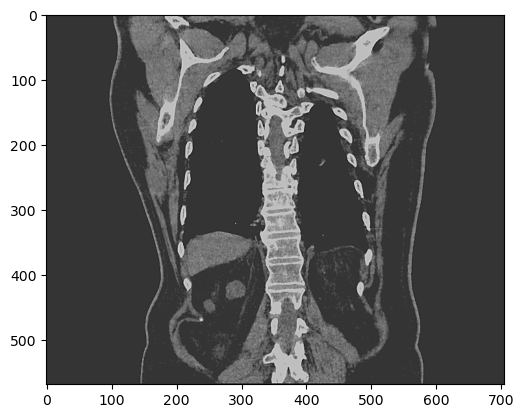

In [8]:
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import gaussian

img = img_as_float(io.imread("Test!/Cyst- (1).jpg", as_gray=True))

gaussian_img = gaussian(img, sigma=1, mode='constant', cval=0.0)

img2 = (img - gaussian_img)*1.

img3 = img + img2

from matplotlib import pyplot as plt
plt.imshow(img3, cmap="gray")

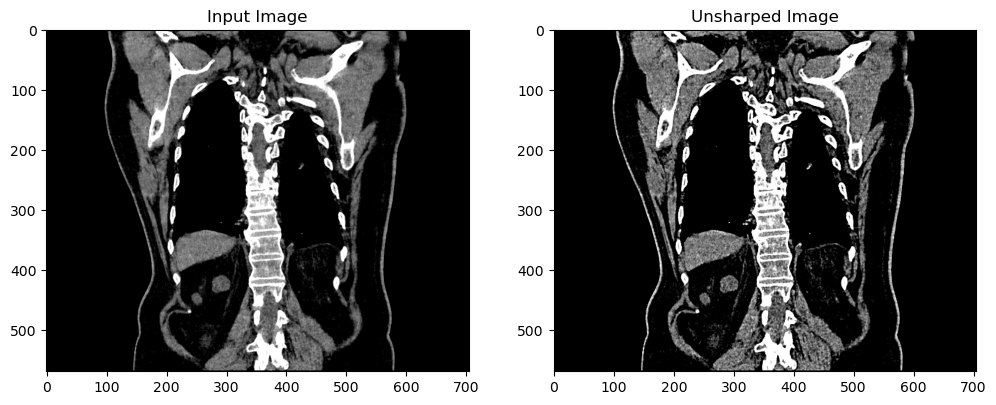

In [10]:
#Unsharp Mask
# from skimage import io
# from skimage.filters import unsharp_mask

img = io.imread("Test!/Cyst- (1).jpg")

#sharpened = unsharp_mask(image0, radius=1.0, amount=1.0)
unsharped_img = unsharp_mask(img, radius=3, amount=1)


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(unsharped_img, cmap='gray')
ax2.title.set_text('Unsharped Image')

plt.show()

# Deconvolution

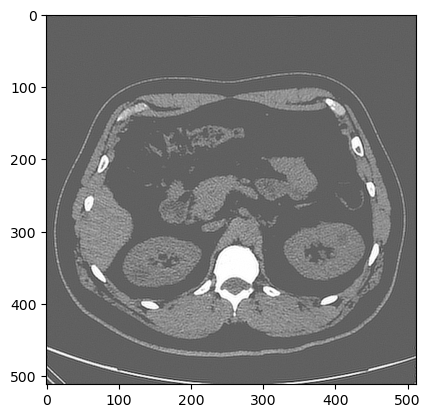

In [16]:
import numpy as np
from skimage import io,restoration
img = io.imread("Test!/Cyst- (2).jpg",as_gray =True)


#PSF

psf = np.ones((3, 3)) / 9  #point spread function to be used for deconvolution.

# print(psf)

deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imshow(deconvolved, cmap='gray')

In [18]:
import matplotlib.pyplot as plt
from skimage import io, color, restoration, img_as_float

img = img_as_float(io.imread("Test!/Cyst- (2).jpg"))
print(img.shape)

#PSF
import scipy.stats as st
import numpy as np

#psf = np.ones((3, 3)) / 9  #point spread function to be used for deconvolution.

#The following page was used as reference to generate the kernel
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

def gkern(kernlen=21, nsig=2):    #Returns a 2D Gaussian kernel.

    lim = kernlen//2 + (kernlen % 2)/2
    x = np.linspace(-lim, lim, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

psf = gkern(5,3)   #Kernel length and sigma
print(psf)


deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imsave("Test!/Cyst_decon(2).jpg", deconvolved, cmap='gray')

(512, 512, 3)
[[0.003765   0.015019   0.02379159 0.015019   0.003765  ]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.02379159 0.0949073  0.15034262 0.0949073  0.02379159]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.003765   0.015019   0.02379159 0.015019   0.003765  ]]


ValueError: could not broadcast input array from shape (5,5) into shape (5,5,3)

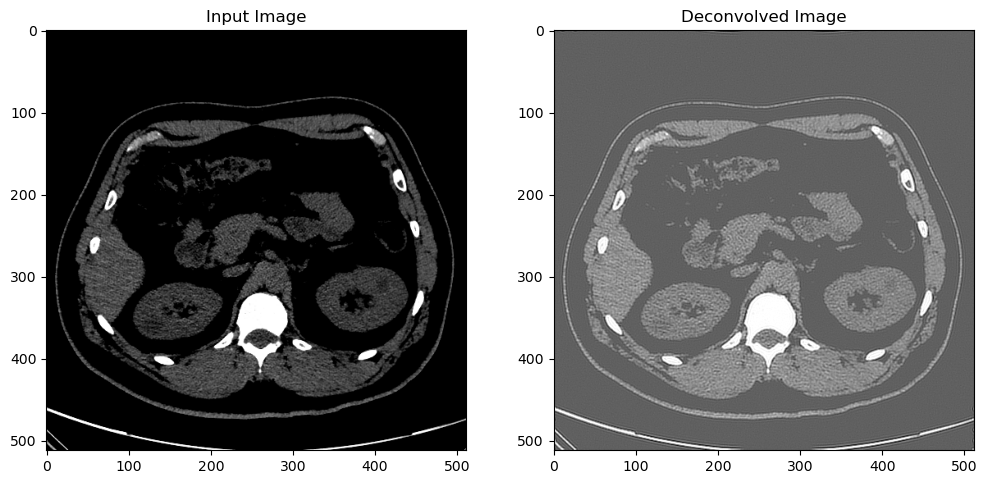

In [20]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(deconvolved, cmap='gray')
ax2.title.set_text('Deconvolved Image')

plt.show()

In [22]:
!git init
!git add .
!git commit -m "Deconvolution"
!git push -u

Reinitialized existing Git repository in C:/Users/Shawon/ImagePreprocessing/.git/


[main 24dd834] Deconvolution
 3 files changed, 329 insertions(+), 3 deletions(-)
 create mode 100644 .ipynb_checkpoints/24November-checkpoint.ipynb
 create mode 100644 24November.ipynb
branch 'main' set up to track 'origin/main'.


To https://github.com/Shaon007/Image_PreProcessing.git
   0d79579..24dd834  main -> main


# Edge Filtering

## Roberts

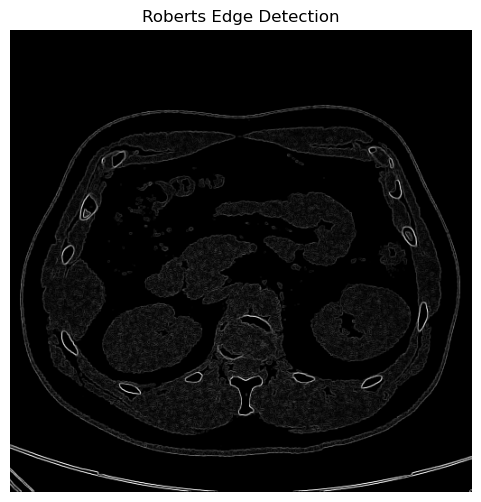

In [40]:
from skimage import io, filters
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
import numpy as np
from skimage.filters import roberts

# Read the image
img = cv2.imread('Test!/Cyst- (12).jpg', 0)  # Grayscale image
if img is None:
    raise FileNotFoundError("Image not found. Check the file path.")

# Apply Roberts edge detection
roberts_img = roberts(img)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(roberts_img, cmap='gray')
plt.title("Roberts Edge Detection")
plt.axis('off')
plt.show()


## Sobel

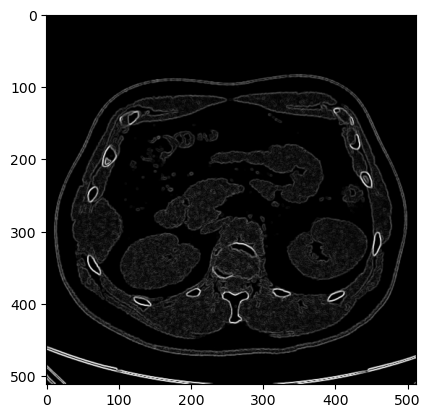

In [45]:
sobel_img = sobel(img)
plt.imshow(sobel_img,cmap='gray')

# cv2.imshow("Sobel", sobel_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Schar 

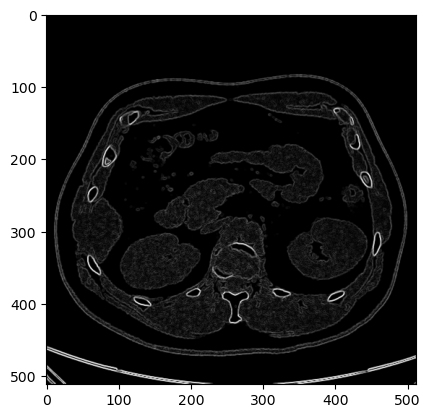

In [48]:
scharr_img = scharr(img)
plt.imshow(scharr_img,cmap='gray')

## Prewitt

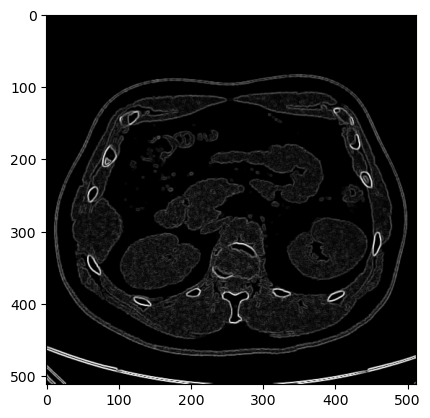

In [51]:
prewitt_img = prewitt(img)
plt.imshow(prewitt_img,cmap='gray')

## farid

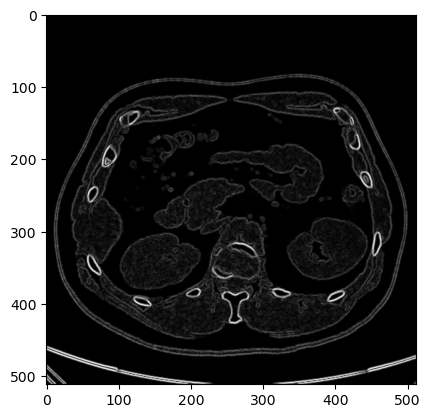

In [54]:
farid_img = farid(img)
plt.imshow(farid_img,cmap='gray')

## Canny 

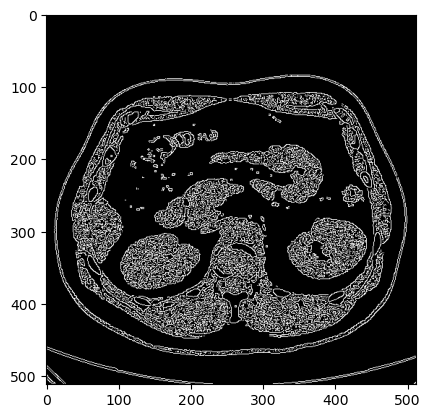

In [59]:
canny_edge = cv2.Canny(img,50,80)

#Autocanny
sigma = 0.3
median = np.median(img)

# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * median)) # lower of double threshold
upper = int(min(255, (1.0 + sigma) * median))  # upper of double threshold
auto_canny = cv2.Canny(img, lower, upper)

plt.imshow(canny_edge,cmap='gray')

## Comparison 

(512, 512)


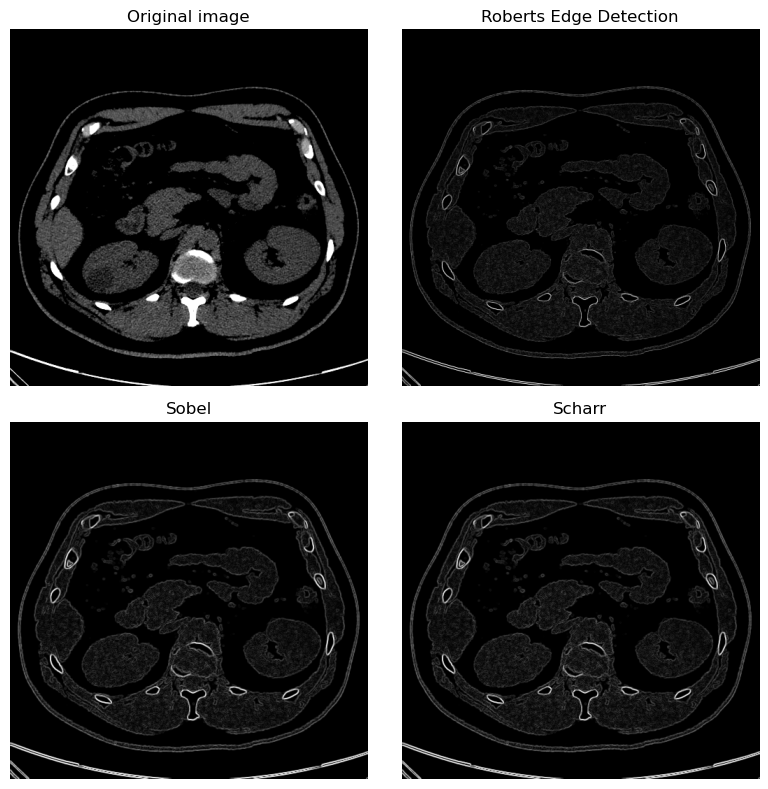

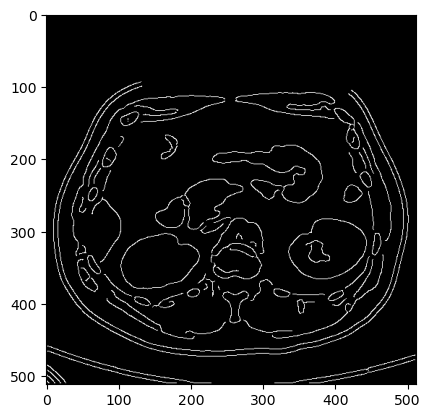

In [64]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt

img = io.imread("Test!/Cyst- (12).jpg", as_gray=True)  #Convert to grey scale
print(img.shape)
#plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

edge_roberts = roberts(img)
#plt.imshow(edge_roberts, cmap=plt.cm.gray, interpolation='nearest')
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)


fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Roberts Edge Detection')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

#Another edge filter is Canny. This is not just a single operation
#It does noise reduction, gradient calculation, and edge tracking among other things. 
#Canny creates a binary file, true or false pixels. 
from skimage import feature
edge_canny = feature.canny(img, sigma=3)
plt.imshow(edge_canny,cmap='gray')

## Neuron Edge Detection 

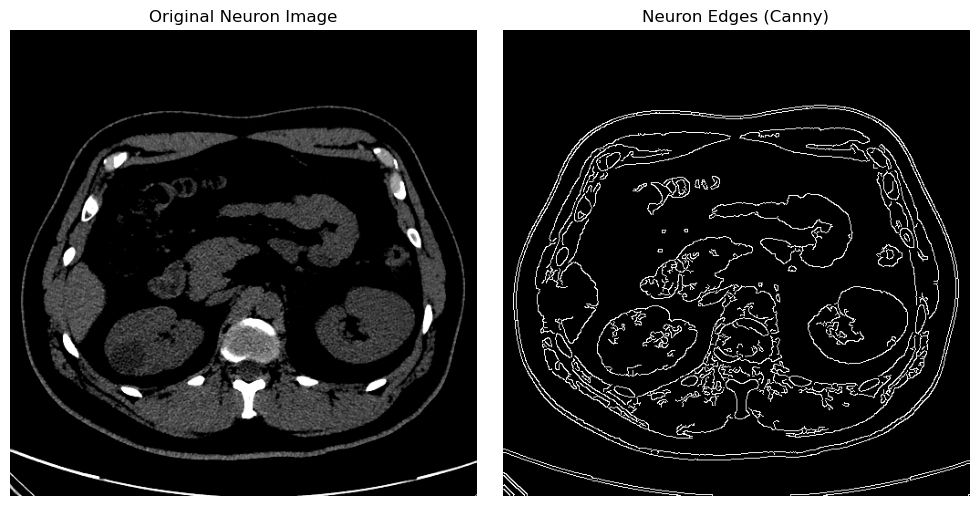

In [70]:

img = cv2.imread("Test!/Cyst- (12).jpg", 0)

# Preprocess: Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150)  # Adjust thresholds (50 and 150) based on your image

# Display the original image and the detected edges
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Neuron Image")
plt.axis('off')

# Neuron Edges using Canny
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Neuron Edges (Canny)")
plt.axis('off')

plt.tight_layout()
plt.show()



In [72]:
!git add .
!git commit -m"done some edge detection"
!git push


[main 7c757be] done some edge detection
 3 files changed, 501 insertions(+), 5 deletions(-)
 create mode 100644 .ipynb_checkpoints/Untitled-checkpoint.ipynb
 create mode 100644 Untitled.ipynb


To https://github.com/Shaon007/Image_PreProcessing.git
   24dd834..7c757be  main -> main
